In [4]:
"""
Jupyter Notebook Name: api_test.ipynb
Description: test Fission url functions
Authors:
    Luxi Bai(1527822)
    Wenxin Zhu (1136510)
    Ze Pang (955698) 
"""

import json
import requests
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
def get_url(url):
    print(url)
    response = requests.get(url)
    if response.status_code == 200:
        return response.text, response.status_code
    else:
        print(f"Failed to retrieve data. HTTP Status code: {response.status_code}")

# start and end are str of date, e.g. "2022-04-18"
# search doc from [start, end), end date is not included
# size is the number of retrieved docs
def search(server, keyword, start=None, end=None,  size=None):
    url = f'http://localhost:9090/search/{server}/keyword/{keyword}'
    if start and end:
        url += f'/start/{start}/end/{end}'
    if size:
        url += f'/size/{size}'
    return get_url(url)

def word_cloud(server, keyword, start=None, end=None, size=None):
    url = f'http://localhost:9090/wordcloud/{server}/keyword/{keyword}'
    if start and end:
        url += f'/start/{start}/end/{end}'
    if size:
        url += f'/size/{size}'
    return get_url(url)
    
def retrieve(server):
    url = f'http://localhost:9090/retrieve/{server}'
    return get_url(url)


# Search

In [9]:
result, status_code = search(server="twitter", keyword="ai")
# assert status_code==200
result, status_code = search(server="twitter", keyword="ai", size=10)
# assert status_code==200
result, status_code = search(server="twitter", keyword="ai", start="2022-04-18", end="2022-04-20")
# assert status_code==200
result, status_code = search(server="twitter", keyword="ai", start="2022-04-18", end="2022-04-20", size=10)
# assert status_code==200

http://localhost:9090/search/twitter/keyword/ai
http://localhost:9090/search/twitter/keyword/ai/size/10
http://localhost:9090/search/twitter/keyword/ai/start/2022-04-18/end/2022-04-20
http://localhost:9090/search/twitter/keyword/ai/start/2022-04-18/end/2022-04-20/size/10


In [7]:
df = pd.DataFrame(json.loads(result))
df.tail()

,sentiment,created_at,coordinates
3,-0.8271,2022-04-18T04:43:42.000Z,"[145.053135344, -37.972566514250005]"
4,0.5255,2022-04-19T11:36:55.000Z,"[138.611159872, -35.000767057000004]"
5,0.4939,2022-04-19T15:52:42.000Z,"[115.928318688, -32.150100419750004]"
6,0.0000,2022-04-18T01:45:09.000Z,"[150.93197479999998, -33.84824400225]"
7,0.8689,2022-04-19T20:04:14.000Z,"[152.194429808, -32.667589903]"


In [8]:
result, status_code = search(server="mastodon", keyword="ai")
assert status_code==200
result, status_code = search(server="mastodon", keyword="ai", size=10)
assert status_code==200
result, status_code = search(server="mastodon", keyword="ai", start="2024-03-18", end="2024-04-20")
assert status_code==200
result, status_code = search(server="mastodon", keyword="ai", start="2024-03-18", end="2024-04-20", size=10)
assert status_code==200

http://localhost:9090/search/mastodon/keyword/ai
http://localhost:9090/search/mastodon/keyword/ai/size/10
http://localhost:9090/search/mastodon/keyword/ai/start/2024-03-18/end/2024-04-20
http://localhost:9090/search/mastodon/keyword/ai/start/2024-03-18/end/2024-04-20/size/10


In [9]:
df = pd.DataFrame(json.loads(result))
df.tail()

,sentiment,created_at
6,-0.5202,2024-04-18 06:15:58+00:00
7,0.0000,2024-04-18 06:33:47+00:00
8,-0.5267,2024-04-18 06:37:31+00:00
9,0.6486,2024-04-18 06:42:45+00:00
10,0.3400,2024-04-18 07:03:02+00:00


# WordCloud

In [10]:
result, status_code = word_cloud(server="twitter", keyword="ai")
assert status_code==200
result, status_code = word_cloud(server="twitter", keyword="ai", size=10)
assert status_code==200
result, status_code = word_cloud(server="twitter", keyword="ai", start="2022-04-18", end="2024-04-20")
assert status_code==200
result, status_code = word_cloud(server="twitter", keyword="ai", start="2022-04-18", end="2024-04-20", size=10)
assert status_code==200

result, status_code = word_cloud(server="mastodon", keyword="ai")
assert status_code==200
result, status_code = word_cloud(server="mastodon", keyword="ai", size=10)
assert status_code==200
result, status_code = word_cloud(server="mastodon", keyword="ai", start="2022-04-18", end="2024-04-20")
assert status_code==200
result, status_code = word_cloud(server="mastodon", keyword="ai", start="2022-04-18", end="2024-04-20", size=10)
assert status_code==200

http://localhost:9090/wordcloud/twitter/keyword/ai
http://localhost:9090/wordcloud/twitter/keyword/ai/size/10
http://localhost:9090/wordcloud/twitter/keyword/ai/start/2022-04-18/end/2024-04-20
http://localhost:9090/wordcloud/twitter/keyword/ai/start/2022-04-18/end/2024-04-20/size/10
http://localhost:9090/wordcloud/mastodon/keyword/ai
http://localhost:9090/wordcloud/mastodon/keyword/ai/size/10
http://localhost:9090/wordcloud/mastodon/keyword/ai/start/2022-04-18/end/2024-04-20
http://localhost:9090/wordcloud/mastodon/keyword/ai/start/2022-04-18/end/2024-04-20/size/10


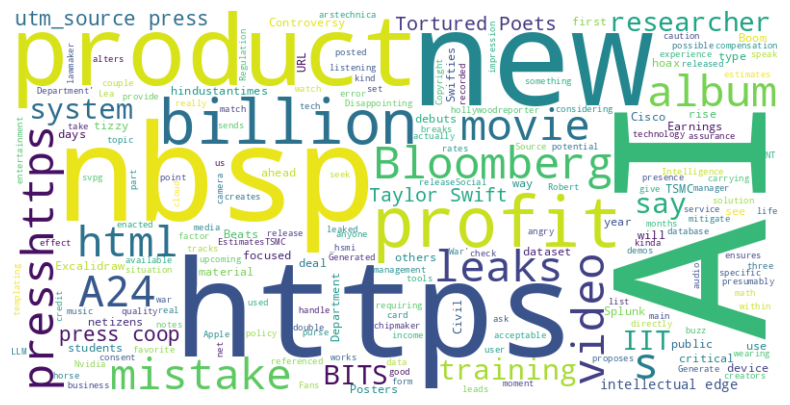

In [11]:
text_freq = json.loads(result)

wordcloud = WordCloud(background_color="white", width=800, height=400).generate_from_frequencies(text_freq)

# Plotting the WordCloud
plt.figure(figsize=(10, 5))  # Setting the figure size
plt.imshow(wordcloud, interpolation='bilinear')  # Showing the wordcloud
plt.axis("off")  # Turning off the axes
plt.show()


# Retrieve

In [12]:
result, status_code = retrieve(server="educ")
assert status_code==200
result, status_code = retrieve(server="incomepsnl")
assert status_code==200


http://localhost:9090/retrieve/educ
http://localhost:9090/retrieve/incomepsnl


In [13]:
df = pd.DataFrame(json.loads(result))
df.tail()

,sa4_code_2021,med_tot_psnl_incom_weekly
84,901.0,906.0
85,504.0,828.0
86,505.0,857.0
87,506.0,808.0
88,801.0,1200.0
